In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import mne

# optional: nicer plots
plt.style.use("seaborn-v0_8")

In [9]:
def threshold_top(mat, percent):
    """
    Keep top X% strongest edges of upper triangle, mirror to full matrix.
    """
    m = mat.copy()
    iu = np.triu_indices_from(m, k=1)
    vals = m[iu]
    keep = int(len(vals) * percent/100)
    
    if keep < 1:
        return np.zeros_like(mat)
    
    # get threshold by sorting
    thresh = np.partition(vals, -keep)[-keep]
    
    # apply
    thr = np.where(m >= thresh, m, 0)
    
    # symmetrize
    thr = np.maximum(thr, thr.T)
    
    return thr


In [10]:
subject = "10"
band = "alpha"

arr = np.load(f"../data/data_derivatives/connectivity_matrices/{subject}_Moderate_{band}_wpli.npy",
              allow_pickle=True)

print("Shape:", arr.shape)   # should be (epochs, 91, 91)


Shape: (37, 91, 91)


In [11]:
mat_epoch0 = arr[30]   # first epoch, shape (91,91)
mat_epoch0 = mat_epoch0 + mat_epoch0.T
np.fill_diagonal(mat_epoch0, 0)


In [20]:
# Get 2D EEG layout from MNE
layout = mne.find_layout(epochs.info)

xy_positions = {name: layout.pos[i][:2]     # only x,y
                for i, name in enumerate(layout.names)
                if name in epochs.ch_names}

print("Loaded 2D positions:", len(xy_positions))


NameError: name 'epochs' is not defined

In [15]:
xy = np.array([xy_positions[ch] for ch in epochs.ch_names])


NameError: name 'epochs' is not defined

In [6]:
def plot_connectivity_topomap(mat, xy, title="", cmap="viridis", lw_scale=4):
    """
    mat: (n_channels, n_channels) connectivity matrix (thresholded or raw)
    xy:  (n_channels, 2) positions in scalp-projected 2D space
    """
    x = xy[:,0]
    y = xy[:,1]

    # colormap normalization
    vals = mat[mat > 0]
    if len(vals) == 0:
        print("No edges to plot.")
        return
    vmin, vmax = vals.min(), vals.max()

    plt.figure(figsize=(7,7))
    plt.scatter(x, y, color="black", s=25, zorder=3)

    # draw edges
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            w = mat[i, j]
            if w > 0:
                color = plt.get_cmap(cmap)((w - vmin) / (vmax - vmin))
                plt.plot([x[i], x[j]], [y[i], y[j]],
                         color=color,
                         alpha=0.7,
                         linewidth=w * lw_scale)

    plt.title(title, fontsize=14)
    plt.axis("off")
    plt.gca().set_aspect("equal", "box")
    plt.show()


In [7]:
mat_thr = threshold_top(mat_epoch0, percent=20)  # top 2%
plot_connectivity_topomap(mat_thr, xy, "Baseline — alpha (Top 2%)")



NameError: name 'threshold_top' is not defined

ASD

In [16]:
import mne
import pandas as pd
from pathlib import Path

manifest = pd.read_csv("../data/data_derivatives/manifests/manifest_hpc.csv")
subject = 10

rows = manifest[manifest["Subject"] == subject]

epochs_dict = {}

for level in ["Baseline", "Mild", "Moderate"]:
    row = rows[rows["SedationLabel"] == level].iloc[0]
    set_path = "../data/" + row["SetPath"]
    epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)


/Users/I743312/Library/Python/3.10/lib/python/site-packages/pymatreader/utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Extracting parameters from /Users/I743312/Documents/NEU/notebooks/../data/data_raw/10-2010-anest 20100305 130.005.set...
Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/jk/5b41_16s639f7vg26nr3qtnw0000gn/T/ipykernel_56892/764707631.py:15: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)
/var/folders/jk/5b41_16s639f7vg26nr3qtnw0000gn/T/ipykernel_56892/764707631.py:15: RuntimeWarning: Unknown types found, setting as type EEG:
ref: ['Cz']
  epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)
/Users/I743312/Library/Python/3.10/lib/python/site-packages/pymatreader/utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Extracting parameters from /Users/I743312/Documents/NEU/notebooks/../data/data_raw/10-2010-anest 20100305 130.010.set...
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/jk/5b41_16s639f7vg26nr3qtnw0000gn/T/ipykernel_56892/764707631.py:15: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)
/var/folders/jk/5b41_16s639f7vg26nr3qtnw0000gn/T/ipykernel_56892/764707631.py:15: RuntimeWarning: Unknown types found, setting as type EEG:
ref: ['Cz']
  epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)
/Users/I743312/Library/Python/3.10/lib/python/site-packages/pymatreader/utils.py:179: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Extracting parameters from /Users/I743312/Documents/NEU/notebooks/../data/data_raw/10-2010-anest 20100305 130.015.set...
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/jk/5b41_16s639f7vg26nr3qtnw0000gn/T/ipykernel_56892/764707631.py:15: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)
/var/folders/jk/5b41_16s639f7vg26nr3qtnw0000gn/T/ipykernel_56892/764707631.py:15: RuntimeWarning: Unknown types found, setting as type EEG:
ref: ['Cz']
  epochs_dict[level] = mne.io.read_epochs_eeglab(set_path)


In [4]:
def compute_alpha_power(epochs):
    psd, freqs = epochs.compute_psd(fmax=40).get_data(return_freqs=True)
    alpha = (freqs >= 8) & (freqs <= 12)
    return psd[:, :, alpha].mean(axis=(0,2))


In [5]:
alpha_power = {
    level: compute_alpha_power(epochs_dict[level])
    for level in ["Baseline", "Mild", "Moderate"]
}


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


NameError: name 'alpha_power' is not defined

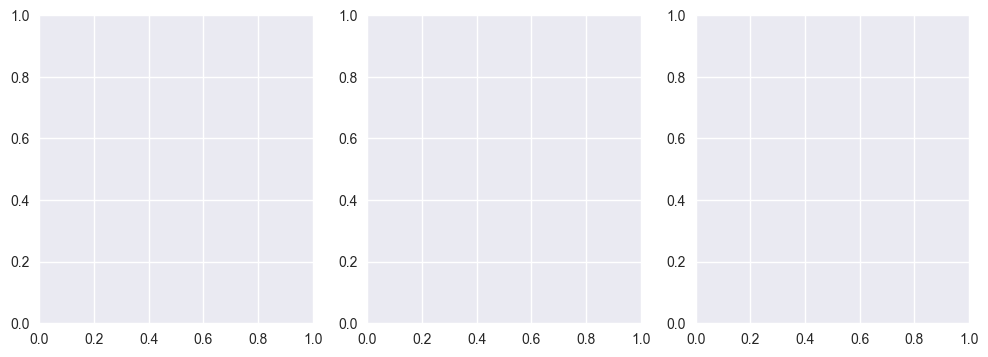

In [17]:
from mne.viz import plot_topomap
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12,4))

for ax, level in zip(axes, ["Baseline", "Mild", "Moderate"]):
    plot_topomap(alpha_power[level], epochs_dict[level].info,
                 axes=ax, show=False)
    ax.set_title(level)

plt.tight_layout()
plt.show()


# Statistical Analyses